### USBL DATA PROCESSING 17_09

Bagfile description:

Test with modified controller parameters (kp is still low
 and kd is back to original value) and adjusting camera
 parameters during the mission. USBL not integrated.
 DVL covariance lowered (now we believe it more). Dense survey B. 
Good survey??
Images with full resolution 1920x1440, 2 fps.


EXTRA INFORMATION:
The xiroi bagfile is shorter so we only have 20 usefull minutes :/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:

path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/17_09/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:

robot="turbot"
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon=create_df("USBLlon",robot)
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

robot="xiroi"
print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints.head())
display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG")
USBLlon_0_x,USBLlon_x=create_df("USBLlon",robot)
#display(USBLlon_0_x.head())
#USBLlon_0_x.describe()

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-17 09:28:48.900,0.036484,-43.774922,-113.372055,31.521029,39.1546,2.9449,0.135136,-0.086541,2.557303
2021-09-17 09:28:49.000,0.032740,-43.776133,-113.370120,31.521029,39.1546,2.9449,0.129154,-0.084177,2.555136
2021-09-17 09:28:49.100,0.036125,-43.791321,-113.360272,31.518281,39.1546,2.9449,0.123275,-0.080620,2.551946
2021-09-17 09:28:49.200,0.047986,-43.797696,-113.354592,31.522900,39.1546,2.9449,0.119861,-0.076513,2.547883
2021-09-17 09:28:49.300,0.049064,-43.803297,-113.349475,31.523590,39.1546,2.9449,0.118268,-0.073541,2.545071


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-17 10:27:41.400,0.124953,-67.553312,-101.907009,32.026045,39.1546,2.9449,0.030906,-0.105846,2.238024
2021-09-17 10:27:41.500,0.125884,-67.549761,-101.904723,32.045948,39.1546,2.9449,0.032440,-0.086744,2.237102
2021-09-17 10:27:41.600,0.126818,-67.540448,-101.910882,32.043835,39.1546,2.9449,0.034411,-0.074313,2.236984
2021-09-17 10:27:41.700,0.129228,-67.530919,-101.916414,32.040569,39.1546,2.9449,0.038537,-0.057961,2.236952
2021-09-17 10:27:41.800,0.132114,-67.526509,-101.917269,32.034039,39.1546,2.9449,0.044637,-0.041357,2.236821


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,35330.000000,35330.000000,35330.000000,35330.000000,35330.0000,3.533000e+04,35330.000000,35330.000000,35330.000000
mean,25.441500,-46.915235,-114.421000,6.898747,39.1546,2.944900e+00,0.026727,-0.067318,0.305734
std,8.156224,11.352358,12.416210,7.972157,0.0000,4.440955e-16,0.062364,0.026243,1.738441
min,-0.047277,-67.900814,-134.779737,3.198138,39.1546,2.944900e+00,-0.127487,-0.363118,-3.141510
25%,27.833144,-56.512165,-126.435243,3.498841,39.1546,2.944900e+00,-0.020764,-0.078934,-0.916408
50%,28.556437,-46.894767,-114.113745,3.548006,39.1546,2.944900e+00,0.017828,-0.063793,-0.559673
75%,29.659785,-37.299312,-102.877023,3.619855,39.1546,2.944900e+00,0.053525,-0.053390,2.533999
max,29.871651,-26.786917,-94.303970,34.407823,39.1546,2.944900e+00,0.325373,0.104473,3.139935


---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
stamp,,,,,,,,,
2021-09-17 09:30:09.800,-6.7924,-25.4499,45.122299,37.892899,-35.637402,-4.8949,0.0213,0.0307,0.24
2021-09-17 09:30:09.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000
mean,24.477756,-32.309584,26.181361,32.401462,-24.241587,25.580006,0.027119,0.011524,-0.297799
std,7.549443,23.181807,26.122760,20.216829,29.084146,7.673514,0.024235,0.024747,0.515220
min,-52.687801,-61.128399,-39.726799,-23.344999,-68.857201,-52.572102,-0.061100,-0.068600,-1.896300
25%,24.457701,-47.490101,6.941700,20.927500,-41.115799,25.142700,0.010600,-0.005400,-0.601300
50%,26.307199,-37.306099,31.786600,36.833000,-32.199200,27.663601,0.026900,0.011300,-0.277900
75%,28.617300,-27.439600,45.812801,48.069099,-17.308201,29.649900,0.042900,0.028300,-0.006800
max,31.949100,58.771301,80.383797,78.126503,72.903198,35.245300,0.103500,0.094800,1.857200


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
stamp,,,,,,,
2021-09-17 09:30:09.800,-129.226977,-31.34882,-5.9924,0.486542,0.0,0.0,0.873657
2021-09-17 09:30:09.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:10.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.0,2501.0,2501.000000
mean,-119.942266,-47.866680,25.277756,0.627587,0.0,0.0,0.757464
std,16.786685,12.512564,7.549443,0.127746,0.0,0.0,0.126790
min,-168.137405,-87.509707,-51.887801,0.200321,0.0,0.0,0.264923
25%,-133.265562,-55.687384,25.257701,0.560471,0.0,0.0,0.740318
50%,-120.211772,-47.345931,27.107199,0.615239,0.0,0.0,0.788341
75%,-103.988126,-39.301691,29.417300,0.672257,0.0,0.0,0.828174
max,-86.140422,-23.182549,32.749100,0.964269,0.0,0.0,0.979730


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,
2021-09-17 09:30:15.100,-124.736136,-31.958331,-6.5851,0.932558,0.011009,-0.057893,0.356179
2021-09-17 09:30:15.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:15.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:15.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-17 09:30:15.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
count,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000
mean,-120.139734,-47.965724,25.345187,0.665477,-0.021774,0.005824,0.067188
std,16.828993,12.711492,7.131042,0.309363,0.020085,0.037141,0.674440
min,-168.137405,-77.578844,-20.805499,-0.001234,-0.106436,-0.076985,-0.999661
25%,-133.448827,-56.383547,25.238076,0.288211,-0.033590,-0.023587,-0.441313
50%,-121.763377,-47.220574,27.055651,0.827108,-0.023317,-0.005289,-0.279783
75%,-103.873734,-39.138367,29.410726,0.943412,-0.011439,0.024851,0.953605
max,-86.140422,-23.222970,32.749100,0.999680,0.096181,0.161856,0.999545


----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-17 09:28:49.800,0.0,-82.695588,-139.772221,0.0,39.1546,2.9449,0.0,0.0,1.769144
2021-09-17 09:28:49.900,0.0,-82.707011,-139.770820,0.0,39.1546,2.9449,0.0,0.0,1.767713
2021-09-17 09:28:50.000,0.0,-82.715005,-139.771059,0.0,39.1546,2.9449,0.0,0.0,1.794109
2021-09-17 09:28:50.100,0.0,-82.723076,-139.767133,0.0,39.1546,2.9449,0.0,0.0,1.811794
2021-09-17 09:28:50.200,0.0,-82.729740,-139.765125,0.0,39.1546,2.9449,0.0,0.0,1.809121


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-17 09:51:30.200,0.0,-128.630832,-118.897592,0.0,39.1546,2.9449,0.0,0.0,0.647970
2021-09-17 09:51:30.300,0.0,-128.646616,-118.893337,0.0,39.1546,2.9449,0.0,0.0,0.657821
2021-09-17 09:51:30.400,0.0,-128.660902,-118.889387,0.0,39.1546,2.9449,0.0,0.0,0.686535
2021-09-17 09:51:30.500,0.0,-128.672053,-118.885515,0.0,39.1546,2.9449,0.0,0.0,0.697146
2021-09-17 09:51:30.600,0.0,-128.673608,-118.875055,0.0,39.1546,2.9449,0.0,0.0,0.713685


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,13609.0,13609.000000,13609.000000,13609.0,13609.0000,1.360900e+04,13609.0,13609.0,13609.000000
mean,0.0,-91.307207,-135.807538,0.0,39.1546,2.944900e+00,0.0,0.0,1.488791
std,0.0,13.644245,6.023718,0.0,0.0000,8.882111e-16,0.0,0.0,0.393230
min,0.0,-128.673608,-140.989250,0.0,39.1546,2.944900e+00,0.0,0.0,0.498247
25%,0.0,-96.431104,-139.743094,0.0,39.1546,2.944900e+00,0.0,0.0,1.206251
50%,0.0,-82.939895,-139.543482,0.0,39.1546,2.944900e+00,0.0,0.0,1.592700
75%,0.0,-82.729587,-133.048224,0.0,39.1546,2.944900e+00,0.0,0.0,1.795510
max,0.0,-81.990085,-118.875055,0.0,39.1546,2.944900e+00,0.0,0.0,2.196186


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


,setpoint_0,setpoint_1
stamp,,
2021-09-17 09:28:49.800,0.247124,0.190968
2021-09-17 09:28:49.900,0.173187,0.175015
2021-09-17 09:28:50.000,0.175684,0.228364
2021-09-17 09:28:50.100,0.188239,0.193833
2021-09-17 09:28:50.200,0.189530,0.187612


,setpoint_0,setpoint_1
count,13609.000000,13609.000000
mean,0.098670,0.004650
std,0.271322,0.268227
min,-0.535040,-0.999792
25%,0.000000,-0.105483
50%,0.000000,0.000000
75%,0.188626,0.176669
max,0.911180,0.911180


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG


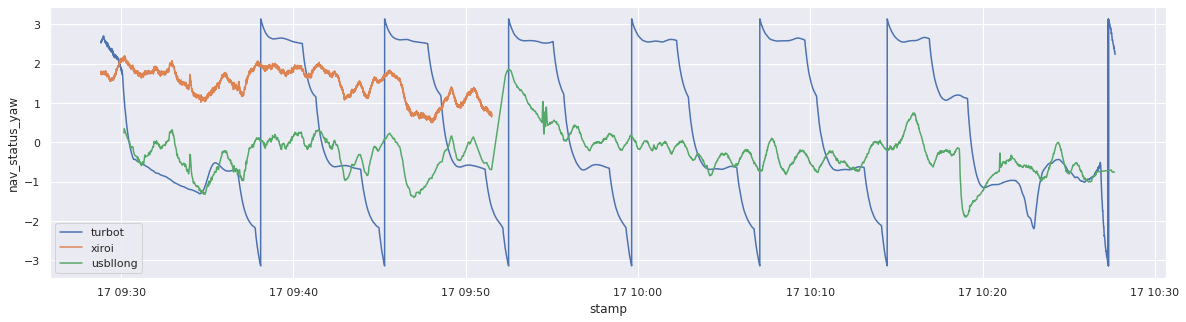

In [5]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [6]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
nav=nav.join(USBLlon).dropna()
#nav=nav.join(modem_delayed).dropna()
nav=nav.join(modem_raw).dropna()
nav.head()

nav=nav.join(xiroi_setpoints).dropna()
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,usbllong_yaw,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z,setpoint_0,setpoint_1
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-17 09:30:15.100,0.807948,-29.345242,-129.952583,29.592103,39.1546,2.9449,-0.115669,-0.020296,0.731854,0.0,...,0.2543,-124.736136,-31.958331,-6.5851,0.932558,0.011009,-0.057893,0.356179,-0.320920,-0.169272
2021-09-17 09:30:23.900,1.831488,-29.217467,-129.155283,28.409944,39.1546,2.9449,-0.009734,-0.119622,0.190007,0.0,...,0.0784,-126.461079,-30.923367,-3.1434,0.993681,-0.058567,-0.010589,0.095164,0.194160,0.196269
2021-09-17 09:30:28.300,2.295449,-29.038667,-128.714342,28.054847,39.1546,2.9449,0.042340,-0.091753,-0.012513,0.0,...,0.0171,-127.872060,-30.321807,-5.7926,0.998747,-0.044601,0.021817,-0.006305,-0.275635,-0.096433
2021-09-17 09:30:29.800,2.431758,-28.988356,-128.569768,27.920354,39.1546,2.9449,0.051062,-0.075295,-0.070568,0.0,...,0.0024,-127.000608,-30.971374,-7.7778,0.998377,-0.036870,0.026703,-0.034219,-0.287296,-0.273757
2021-09-17 09:30:30.800,2.538556,-28.983949,-128.474306,27.826817,39.1546,2.9449,0.062664,-0.068038,-0.103660,0.0,...,-0.0504,-127.542649,-30.966877,-10.4908,0.997650,-0.032351,0.033055,-0.050542,-0.146465,0.138535


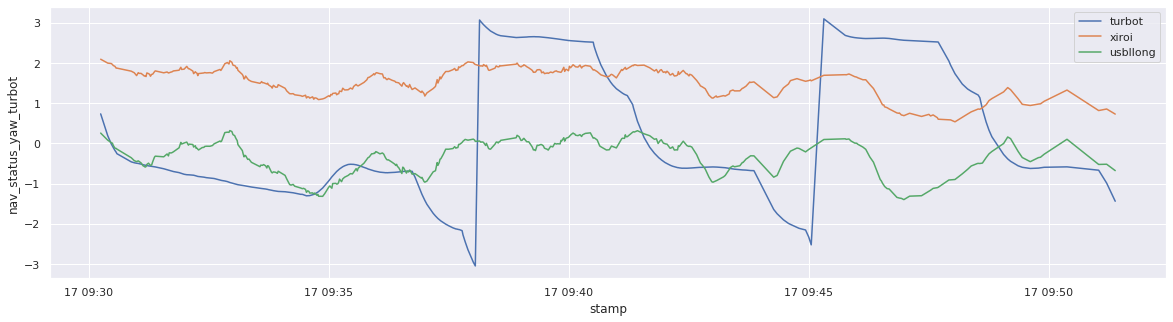

In [7]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [8]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
print(yaw_diff*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] + yaw_diff

109.08630446763345


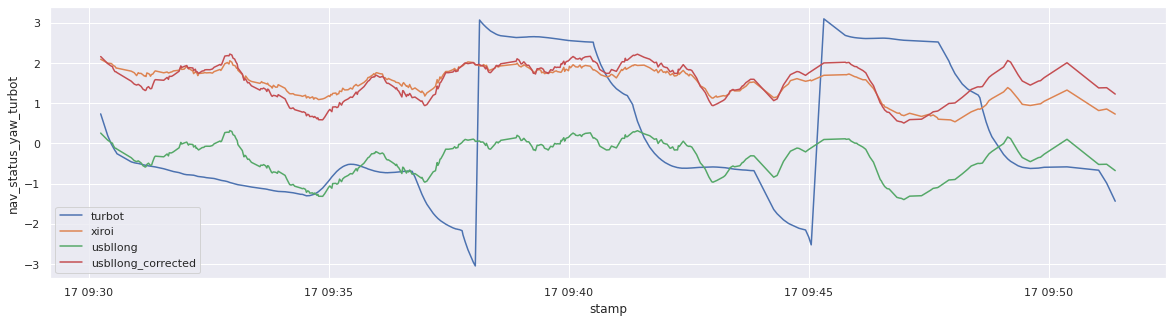

In [9]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [10]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p2_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p2_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf


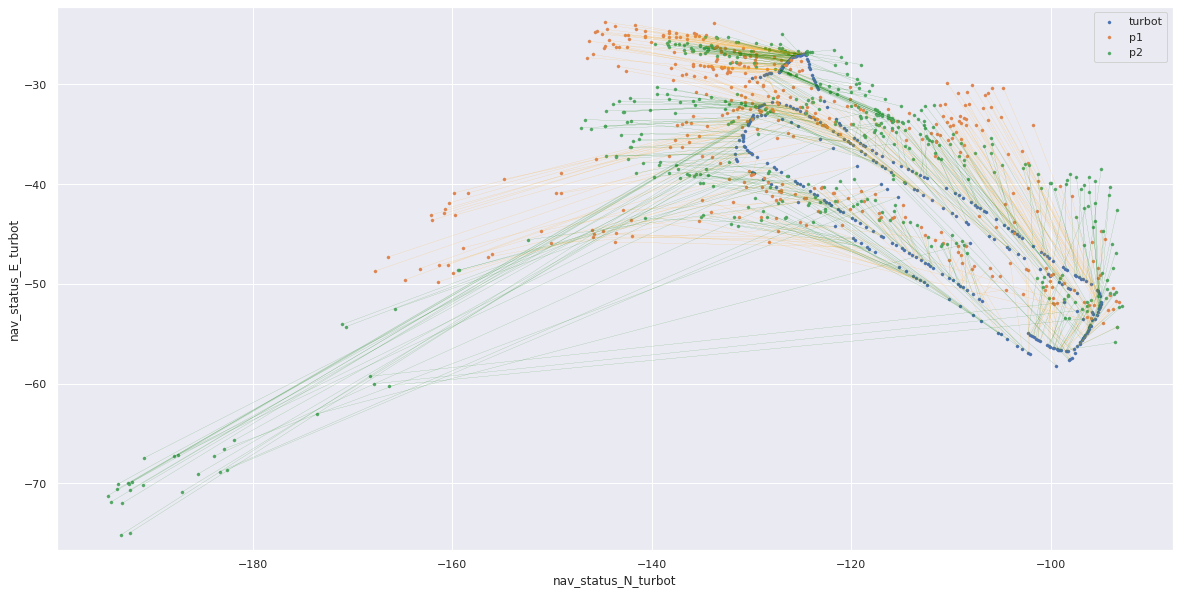

In [11]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","p1","p2","modem_raw"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

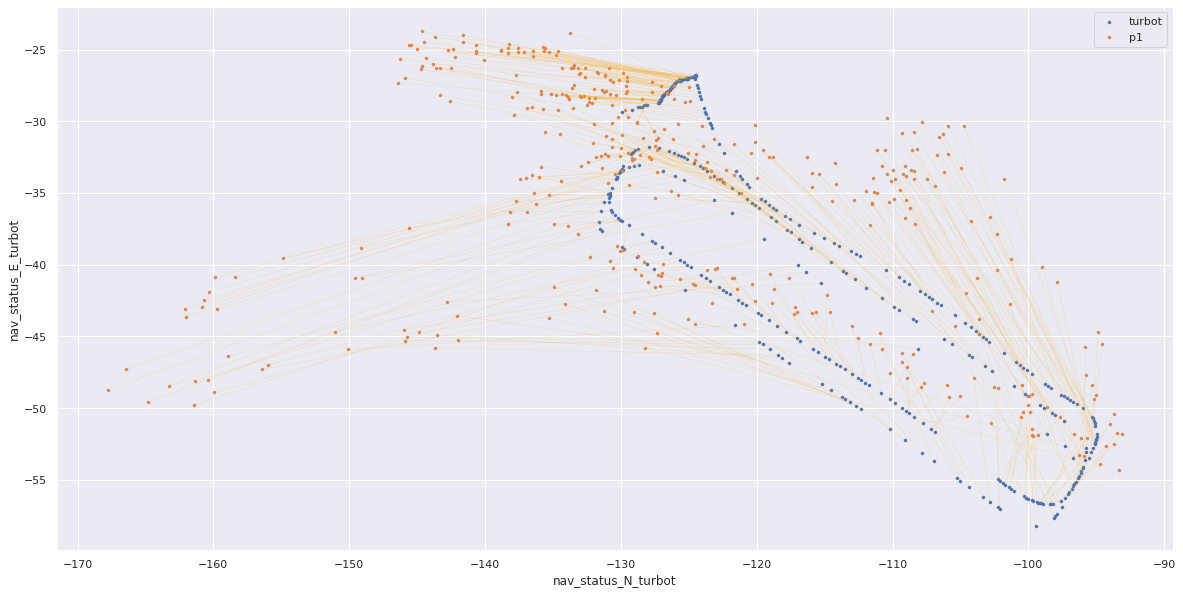

In [23]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","p1","p2","modem_raw"])

for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
# for index, row in nav.iterrows():
#     plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
# plt.axis('equal')
# plt.show()

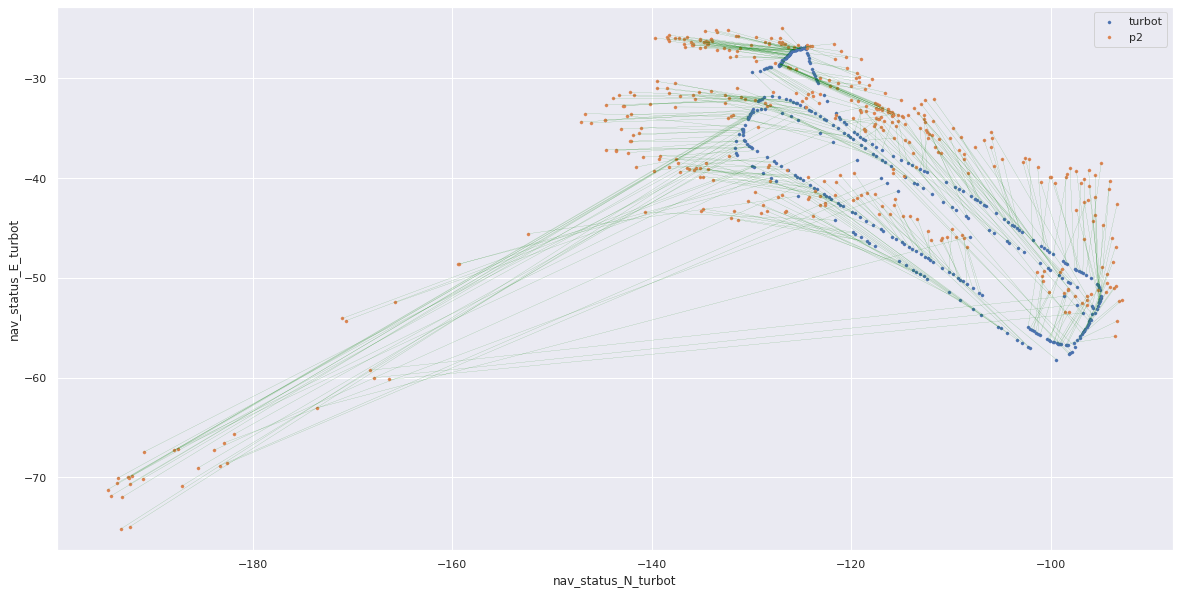

In [25]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","p2","p2","modem_raw"])

# for index, row in nav.iterrows():
#     plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

In [12]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p2,2)+np.power(E_error_p2,2))

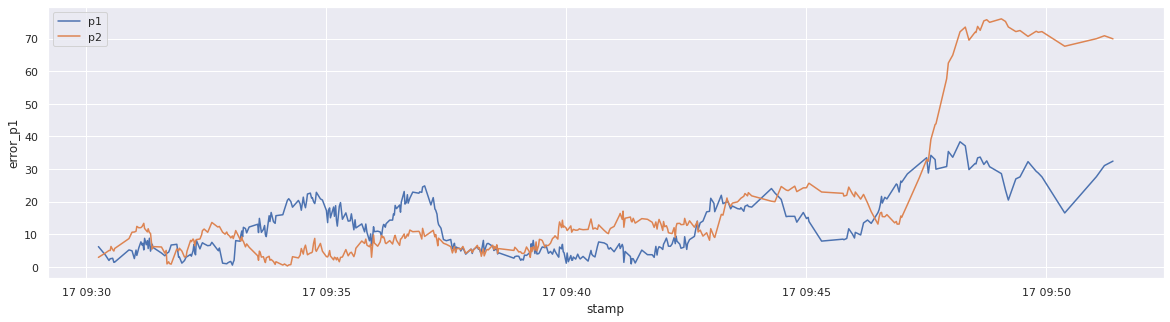

In [13]:
# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
plt.legend(["p1","p2"])
plt.show()

In [14]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [15]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,setpoint_1,usbllong_yaw_corrected,p1_N,p1_E,p2_N,p2_E,error_p1,error_p2,dist_2D,dist_3D
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-17 09:30:15.100,0.807948,-29.345242,-129.952583,29.592103,39.1546,2.9449,-0.115669,-0.020296,0.731854,0.0,...,-0.169272,2.158215,-124.465524,-32.272065,-127.846114,-31.372328,6.218851,2.923403,54.021763,54.027804
2021-09-17 09:30:23.900,1.831488,-29.217467,-129.155283,28.409944,39.1546,2.9449,-0.009734,-0.119622,0.190007,0.0,...,0.196269,1.982315,-126.171149,-31.255385,-125.496014,-31.436644,3.613608,4.279602,54.327774,54.358637
2021-09-17 09:30:28.300,2.295449,-29.038667,-128.714342,28.054847,39.1546,2.9449,0.042340,-0.091753,-0.012513,0.0,...,-0.096433,1.921015,-127.596450,-30.654043,-124.340363,-31.522259,1.964466,5.029903,54.559742,54.608008
2021-09-17 09:30:29.800,2.431758,-28.988356,-128.569768,27.920354,39.1546,2.9449,0.051062,-0.075295,-0.070568,0.0,...,-0.273757,1.906315,-127.281575,-31.170514,-124.503497,-31.930883,2.534020,5.019266,54.499583,54.553808
2021-09-17 09:30:30.800,2.538556,-28.983949,-128.474306,27.826817,39.1546,2.9449,0.062664,-0.068038,-0.103660,0.0,...,0.138535,1.853515,-127.391145,-31.274839,-123.251880,-32.455321,2.534051,6.270898,54.588713,54.647707


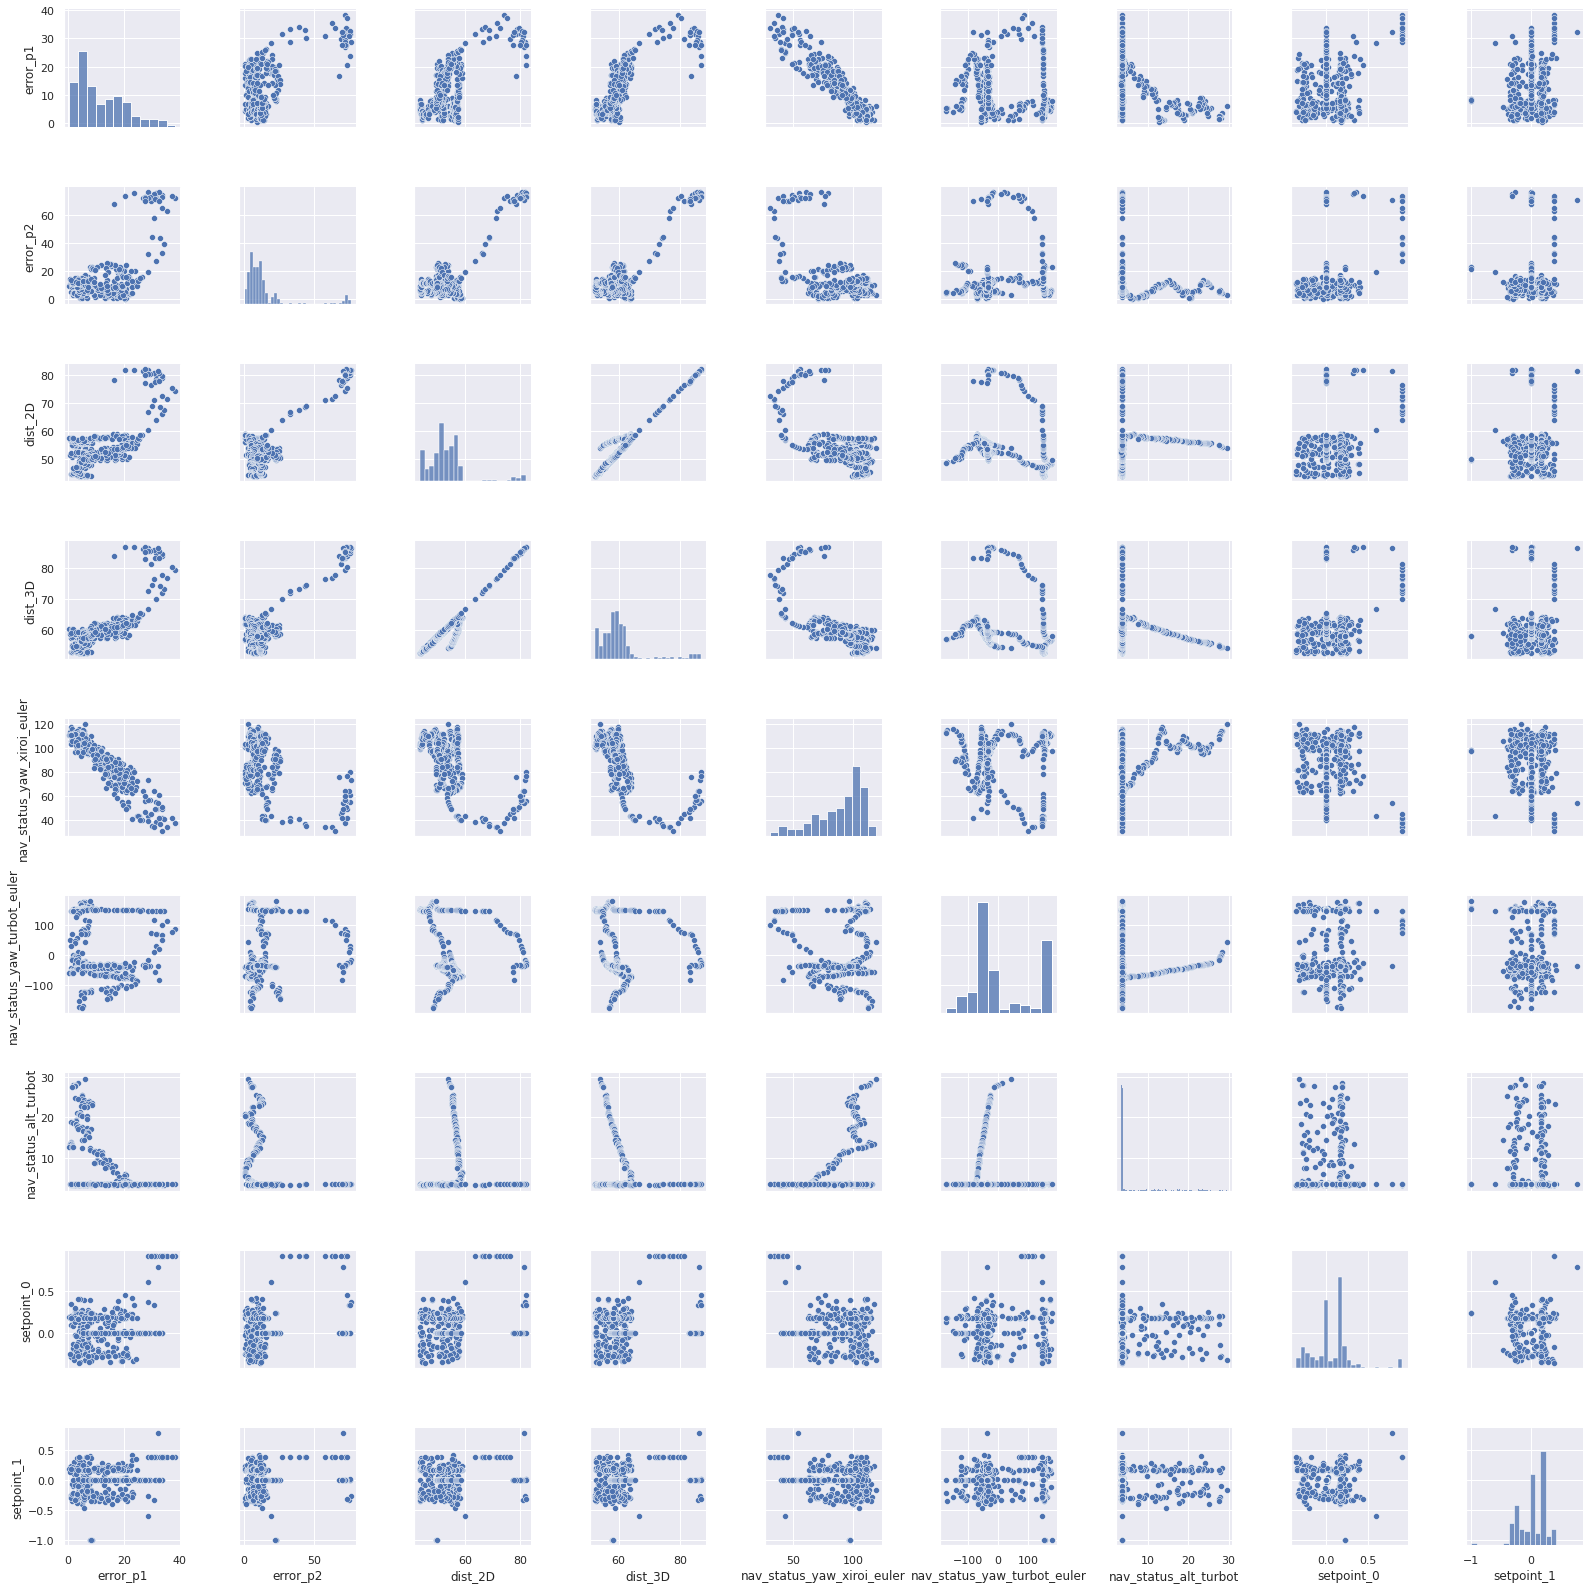

In [16]:
# Error correlation with distance and orientation
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
nav['nav_status_yaw_turbot_euler'] = nav['nav_status_yaw_turbot'] *180/np.pi 
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi_euler','nav_status_yaw_turbot_euler','nav_status_alt_turbot',"setpoint_0","setpoint_1"]]
sns.pairplot(nav_corr)

,error_p1,error_p2,dist_3D,nav_status_yaw_xiroi
count,407.000000,407.000000,407.000000,407.000000
mean,11.812567,13.932883,60.238529,1.560088
std,8.516871,16.282042,6.977568,0.347566
min,0.548658,0.291803,52.421227,0.534429
25%,5.134881,5.536055,56.598157,1.359403
50%,8.764133,9.490790,58.897685,1.684711
75%,17.838035,13.524510,61.325448,1.817115
max,38.378632,76.074476,86.685668,2.091521


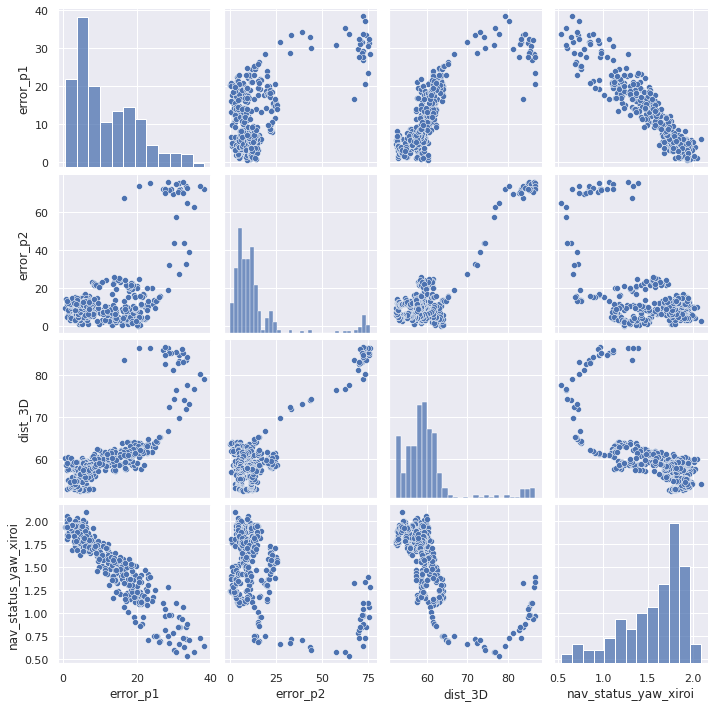

In [17]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

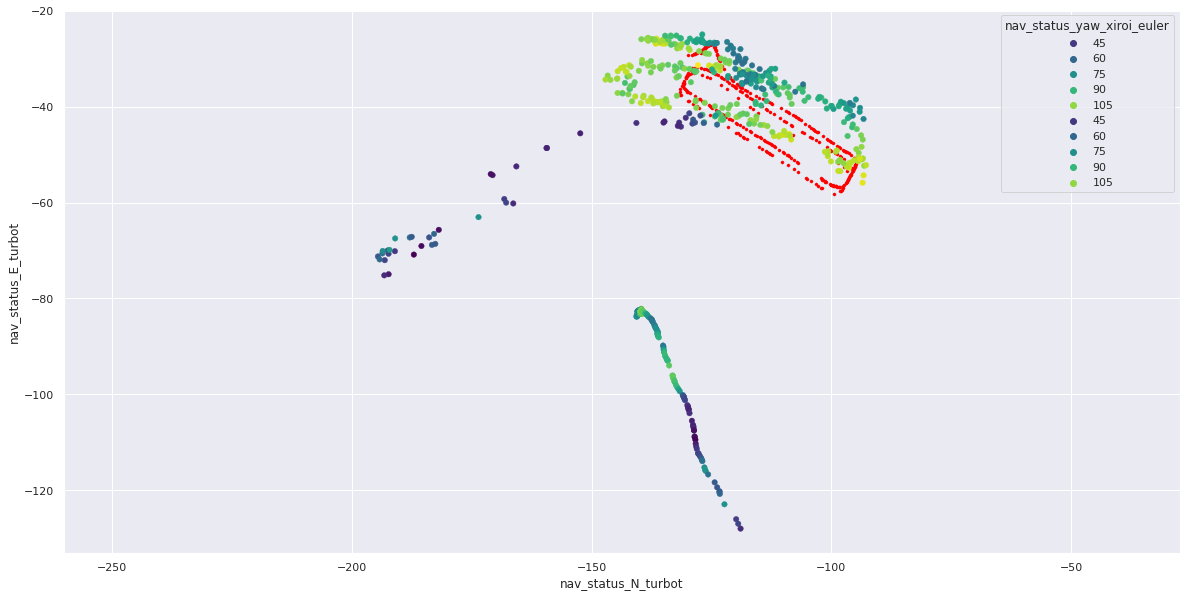

In [18]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

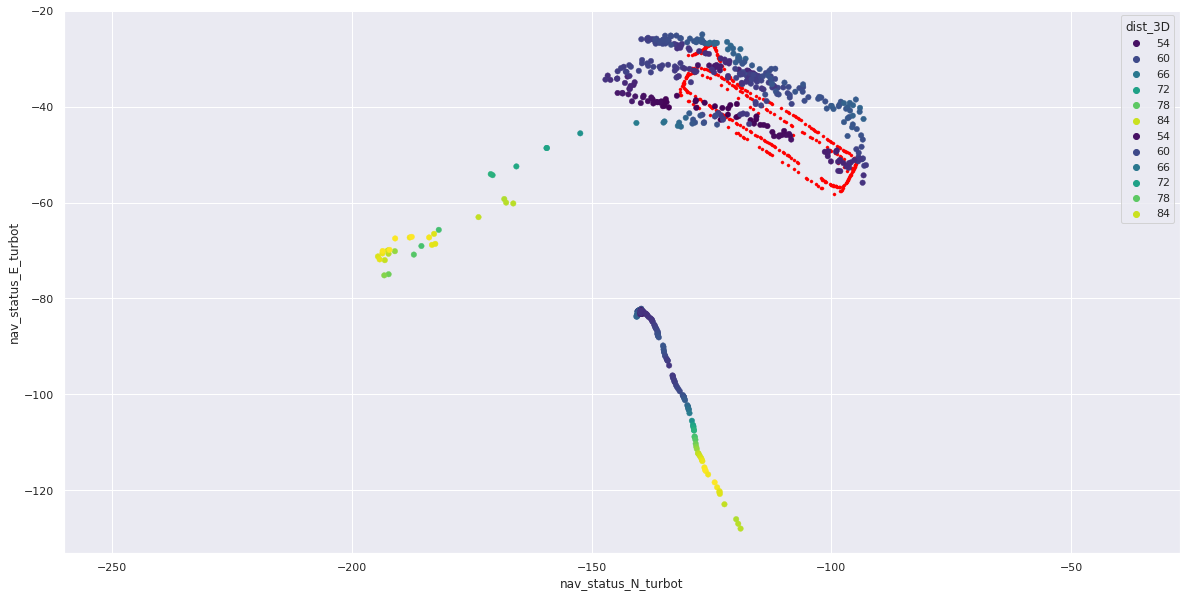

In [19]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

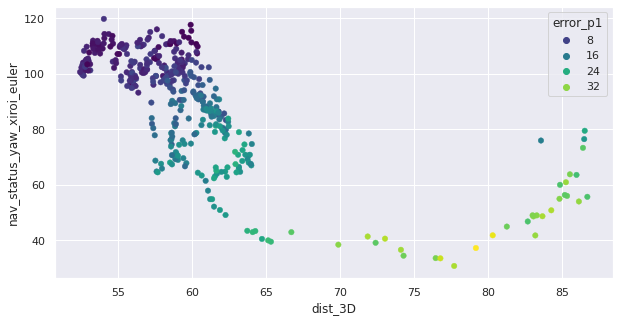

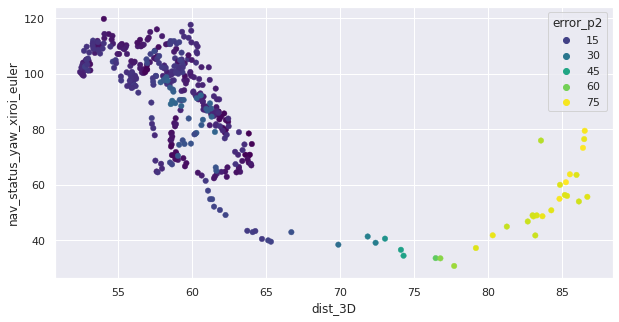

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p1', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p2', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()

In [21]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too